<a href="https://colab.research.google.com/github/Blantranderozari/Blantranderozari/blob/main/Draft_Tugas_Proyek_Akhir_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir Dicoding Module: Belajar Machine Learning untuk Pemula
oleh Antonius Blantran de Rozari

## Kriteria

* ~Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.~
* Dataset harus dibagi menjadi train set dan validation set.
* Ukuran validation set harus 40% dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
* Harus mengimplementasikan augmentasi gambar.
* Menggunakan image data generator.
* Model harus menggunakan model sequential.
* Pelatihan model tidak melebihi waktu 30 menit.
* ~Program dikerjakan pada Google Colaboratory.~
* Akurasi dari model minimal 85%.
* Dapat memprediksi gambar yang diunggah ke Colab
* Menambahkan data diri (sesuai profil Dicoding) pada submission/project yang dikirimkan.

Pilihan pertama:
1. Mulai dari awal sama sekali
2. Mulai dengan best weight result dan lanjutkan training
3. Langsung deteksi





## Aktifkan GPU


In [1]:
# Gunakan GPU yang disediakan oleh Google Colab
import tensorflow as tf 
print(f"Versi tensorflow {tf.__version__}")

if (tf.config.list_physical_devices('GPU')):
  print(f"Tersedia GPU sejumlah {len(tf.config.list_physical_devices('GPU'))} dengan name {tf.test.gpu_device_name()}")
else:
  print("GPU tidak diaktifkan atau belum tersedia saat ini")


Versi tensorflow 2.9.2
GPU tidak diaktifkan atau belum tersedia saat ini


In [2]:
#!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
#!unzip rockpaperscissors.zip

## Unduh data dan tampilkan contoh citra tiap kategor

Dataset menyimpan 2.188 citra yang terbagi atas 3 kelas yaitu: 'Rock' (726 citra), 'Paper' (710 citra) and 'Scissors' (752 citra) dalam format png berukuran 300 x 200 pixels. Setiap kelas citra disimpan dalam tiga sub-folders dengan nama sesuai dengan kelasnya masing-masing.

In [23]:
import pathlib
import tensorflow as tf
from tensorflow.keras.utils import get_file

url_data = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
base_dir = get_file(origin=url_data, cache_dir="/contents", 
                    archive_format='auto', extract=True)
base_dir = pathlib.Path(base_dir)
print(base_dir)
image_count = len(list(base_dir.glob('*/*.png')))
print(image_count)

#import os

#base_dir = os.getcwd()
#base_dir = os.path.join(base_dir,'rockpaperscissors')
#jumlah_citra = len(list(base_dir.glob('*/*.png')))

322873683/322873683 [==============================] - 2s 0us/step
/tmp/.keras/datasets/rockpaperscissors.zip
0


In [24]:
image_count = len(list(base_dir.glob('*/*.png')))
print(image_count)

0


In [ ]:
import os

kategori = ['rock', 'paper', 'scissors']

base_dir = os.getcwd()
base_dir = os.path.join(base_dir,'rockpaperscissors')

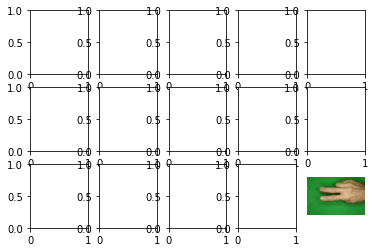

In [21]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=3, ncols=5)

for path in kategori:
  cur_dir = os.path.join(base_dir, path)
  os.chdir(cur_dir)
  files = os.listdir(cur_dir)
  for img in files[:5]:
     image = plt.imread(img)

plt.axis('off')
plt.imshow(image)
#train_dir = os.path.join(base_dir,'train')
#validation_dir = os.path.join(base_dir, 'val')

## Proses Augmentasi Citra dan generate data 
untuk pelatihan dan validasi 

In [5]:
# Proses Augmentasi citra

#from tensorflow.keras.preprocesing.image import ImageDataGenerator --> tidak dianjurkan karena sudah diganti dengan
from tf.keras.utils import image_dataset_from_directory

data_latihan = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,    # nominal 20 derajat
    horizontal_flip = True, # mungkin harus mencoba vertical_flip untuk melihat pengaruhnya
    shear_range = 0.5       # nominal 0.2 derajat
    validation_split = 0.4  # porsi data untuk validasi 
)

data_validasi = ImageDataGenerator(
    rescale = 1./255.
)

In [ ]:
# Iterasi untuk membuat data citra untuk pelatihan dan validasi
citra_latihan = data_latihan.flowfromdirectory()